In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Success")

Success


In [2]:
df = pd.read_csv('fods_1.csv')
df

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979
...,...,...,...
541,3.326,2.837,4.651
542,3.275,2.727,3.953
543,5.165,3.111,6.219
544,2.859,2.614,4.995


In [3]:
meanX1 = df['MLOGP'].mean()
meanX2 = df['RDCHI'].mean()
meanY = df['quantitative response of LC50'].mean()
stdX1 = df['MLOGP'].std()
stdX2 = df['RDCHI'].std()
stdY = df['quantitative response of LC50'].std()
print(meanX1, meanX2, meanY, stdX1, stdX2, stdY)

2.3134926739926738 2.4922985347985356 4.6584212454212475 1.741797285664983 0.8110039291512505 1.6652150617992907


In [4]:
# standardization
df['MLOGP'] = (df['MLOGP'] - df['MLOGP'].min())/(df['MLOGP'].max() - df['MLOGP'].min())
df['RDCHI'] = (df['RDCHI'] - df['RDCHI'].min())/(df['RDCHI'].max() - df['RDCHI'].min())
df

,MLOGP,RDCHI,quantitative response of LC50
0,0.568488,0.041368,3.740
1,0.582532,0.073727,4.330
2,0.785238,0.354845,7.019
3,0.763050,0.346939,6.723
4,0.674234,0.323221,5.979
...,...,...,...
541,0.626651,0.337746,4.651
542,0.623381,0.317522,3.953
543,0.744581,0.388123,6.219
544,0.596704,0.296746,4.995


In [5]:
df.isnull().sum()

MLOGP                            0
RDCHI                            0
quantitative response of LC50    0
dtype: int64

In [6]:
train = df.sample(frac = 0.8)
test = df.drop(train.index)
train

,MLOGP,RDCHI,quantitative response of LC50
0,0.568488,0.041368,3.740
301,0.418687,0.413495,2.928
313,0.549763,0.169884,6.409
163,0.607413,0.336091,4.339
478,0.514044,0.302261,4.910
...,...,...,...
526,0.520264,0.189557,4.462
447,0.496537,0.191579,2.829
183,0.532577,0.181835,3.432
529,0.326279,0.373782,3.103


In [7]:
test

,MLOGP,RDCHI,quantitative response of LC50
4,0.674234,0.323221,5.979
8,0.545915,0.147086,3.941
27,0.554508,0.520316,6.424
29,0.700654,0.415150,5.721
36,0.700526,0.732488,5.440
...,...,...,...
514,0.614275,0.243427,6.210
519,0.549763,0.166942,5.190
524,0.595678,0.412576,4.022
531,0.669104,0.376356,4.121


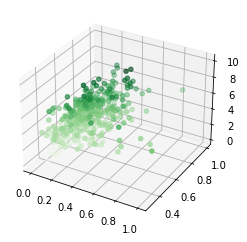

In [8]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = train["quantitative response of LC50"]
xdata = train["RDCHI"]
ydata = train["MLOGP"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [9]:
trainX = pd.DataFrame(train[["RDCHI", "MLOGP"]])
trainX

,RDCHI,MLOGP
0,0.041368,0.568488
301,0.413495,0.418687
313,0.169884,0.549763
163,0.336091,0.607413
478,0.302261,0.514044
...,...,...
526,0.189557,0.520264
447,0.191579,0.496537
183,0.181835,0.532577
529,0.373782,0.326279


In [10]:
trainY = pd.DataFrame(train["quantitative response of LC50"])
trainY

,quantitative response of LC50
0,3.740
301,2.928
313,6.409
163,4.339
478,4.910
...,...
526,4.462
447,2.829
183,3.432
529,3.103


In [11]:
testX = pd.DataFrame(test[["RDCHI", "MLOGP"]])
testY = pd.DataFrame(test['quantitative response of LC50'])
testX

,RDCHI,MLOGP
4,0.323221,0.674234
8,0.147086,0.545915
27,0.520316,0.554508
29,0.415150,0.700654
36,0.732488,0.700526
...,...,...
514,0.243427,0.614275
519,0.166942,0.549763
524,0.412576,0.595678
531,0.376356,0.669104


In [12]:
testY

,quantitative response of LC50
4,5.979
8,3.941
27,6.424
29,5.721
36,5.440
...,...
514,6.210
519,5.190
524,4.022
531,4.121


In [13]:
valX = trainX[trainX.columns[:]].to_numpy()
valX = np.append(np.ones((437,1)), valX, axis=1)
valY = trainY[trainY.columns[:]].to_numpy()
np.shape(valX)
# np.reshape(valX, (436,3))

(437, 3)

In [14]:
np.shape(valY)

(437, 1)

In [15]:
valTestX = testX[testX.columns[:]].to_numpy()
valTestX = np.append(np.ones((109,1)), valTestX, axis=1)
valTestY = testY[testY.columns[:]].to_numpy()
np.shape(valTestX)

(109, 3)

In [16]:
np.shape(valTestY)

(109, 1)

In [17]:
iters = 1500000
learningRate = 0.001 #yeta or n
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)
TrainErrorArray = np.array([])
TestErrorArray = np.array([])

In [18]:
# Degree 1 here without regularization
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0))#del E
    # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2]
#     for j in range(np.shape(valX)[0]):
#         w2 += (((valY[j,0] - (w*valX[j,:wSize])))*valX[j,:wSize])/np.shape(valX)[0]

    #w2 = w2/np.shape(valX)[0] #N
    
    w1 = w - learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "= ", w[i], sep = '')


w0= 2.955513306858264
w1= 1.6844949707333343
w2= 2.2761396855739395


In [19]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
TrainErrorArray = np.append(TrainErrorArray, w1)
w1/np.shape(valX)[0]

2.2048567634132024

In [20]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += (np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2
    
TestErrorArray = np.append(TestErrorArray, testError)
testError/np.shape(valTestX)[0]

1.9787155581180627

In [21]:
# Reularization variables
LambdaArr = np.arange(0.01,1.01,0.01)
q = 0.5

In [22]:
# Finding optimal lambda for Degree 1 here with regularization q = 0.5
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)
TrainErrorArrayLambda = np.array([])
TestErrorArrayLambda = np.array([])

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for Lambda in LambdaArr:
    for i in range(iters):
        z = w.copy()
        z = z**(q-1)
        z[0] = 0
        w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z)/2
        # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]

        w1 = w - learningRate*w2
        if w1[0] - w[0] <= 10**(-20):
            w=w1
            break
        w=w1
        counter+=1
        costArr[counter] = w2[0]
        counterArr[counter] = counter
    
    ErrorLambdas = 0
    for i in range(np.shape(valX)[0]):
        ErrorLambdas += ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

    TrainErrorArrayLambda = np.append(TrainErrorArrayLambda, ErrorLambdas)
    
    testError = 0
    for i in range(np.shape(valTestX)[0]):
        testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

    TestErrorArrayLambda = np.append(TestErrorArrayLambda, testError)


minIndex = int(np.where(z == np.amin(z))[0])
print(minIndex)


Lambda = (minIndex+1)*0.01
print("Optimal Lambda = ", Lambda, sep = '')

0
Optimal Lambda = 0.01


In [23]:
# Degree 1 here with regularization q = 0.5
q = 0.5
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    z = w.copy()
    z = z**(q-1)
    z[0] = 0
    w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z)/2
    # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]
    
    w1 = w - learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   
print("Optimal Lambda =", Lambda)
for i in range(np.shape(w)[0]):    
    print("w", i, "= ", w[i], sep = '')


Optimal Lambda = 0.01
w0= 2.9555184699217194
w1= 1.684484205201742
w2= 2.276131596061231


In [24]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TrainErrorArray = np.append(TrainErrorArray, w1)
w1/np.shape(valX)[0]

2.2274873329671925

In [25]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TestErrorArray = np.append(TestErrorArray, testError)
testError/np.shape(valTestX)[0]

2.0013455789934165

In [26]:
# Degree 1 here with regularization q = 1
q = 1
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for Lambda in LambdaArr:
    for i in range(iters):
        z = np.array([0,1,1])
        w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z)/2
        # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]

        w1 = w - learningRate*w2
        if w1[0] - w[0] <= 10**(-20):
            w=w1
            break
        w=w1
        counter+=1
        costArr[counter] = w2[0]
        counterArr[counter] = counter

        ErrorLambdas = 0
        for i in range(np.shape(valX)[0]):
            ErrorLambdas += ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

        TrainErrorArrayLambda = np.append(TrainErrorArrayLambda, ErrorLambdas)

        testError = 0
        for i in range(np.shape(valTestX)[0]):
            testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

        TestErrorArrayLambda = np.append(TestErrorArrayLambda, testError)


minIndex = int(np.where(z == np.amin(z))[0])
print(minIndex)


Lambda = (minIndex+1)*0.01
print("Optimal Lambda = ", Lambda, sep = '')

   




0
Optimal Lambda = 0.01


In [27]:
# Degree 1 here with regularization q = 1
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    z = np.array([0,1,1])
    w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z)/2
    # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]
    
    w1 = w - learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "= ", w[i], sep = '')


w0= 2.955526220086579
w1= 1.6844693130196646
w2= 2.2761174507338766


In [28]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w))/2

TrainErrorArray = np.append(TrainErrorArray, w1)
w1/np.shape(valX)[0]

2.239442279183356

In [29]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TestErrorArray = np.append(TestErrorArray, testError)
testError/np.shape(valTestX)[0]

2.013299655898221

In [30]:
# Degree 1 here with regularization q = 2
q = 2
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for Lambda in LambdaArr:
    for i in range(iters):
        z = w.copy()
        z[0]=0
        w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z**(q-1))/2
        # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]

        w1 = w - learningRate*w2
        if w1[0] - w[0] <= 10**(-20):
            w=w1
            break
        w=w1
        counter+=1
        costArr[counter] = w2[0]
        counterArr[counter] = counter
        
        ErrorLambdas = 0
        for i in range(np.shape(valX)[0]):
            ErrorLambdas += ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

        TrainErrorArrayLambda = np.append(TrainErrorArrayLambda, ErrorLambdas)

        testError = 0
        for i in range(np.shape(valTestX)[0]):
            testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

        TestErrorArrayLambda = np.append(TestErrorArrayLambda, testError)


minIndex = int(np.where(z == np.amin(z))[0])
print(minIndex)


Lambda = (minIndex+1)*0.01
print("Optimal Lambda = ", Lambda, sep = '')

0
Optimal Lambda = 0.01


In [31]:
# Degree 1 here with regularization q = 2
q = 2
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    z = w.copy()
    z[0]=0
    w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z**(q-1))/2
    # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]
    
    w1 = w - learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "= ", w[i], sep = '')


w0= 2.9555561861938755
w1= 1.6844209908499288
w2= 2.276051492483175


In [32]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TrainErrorArray = np.append(TrainErrorArray, w1)
w1/np.shape(valX)[0]

2.2886385710385446

In [33]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TestErrorArray = np.append(TestErrorArray, testError)
testError/np.shape(valTestX)[0]

2.062492468141981

In [34]:
# Reularization variables
Lambda = np.exp(-7)
q = 4

In [36]:
# Degree 1 here with regularization q = 4
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for Lambda in LambdaArr:
    for i in range(iters):
        z = w.copy()
        z[0]=0
        w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z**(q-1))/2
        # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]

        w1 = w - learningRate*w2
        if w1[0] - w[0] <= 10**(-20):
            w=w1
            break
        w=w1
        counter+=1
        costArr[counter] = w2[0]
        counterArr[counter] = counter
        
        ErrorLambdas = 0
        for i in range(np.shape(valX)[0]):
            ErrorLambdas += ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

        TrainErrorArrayLambda = np.append(TrainErrorArrayLambda, ErrorLambdas)

        testError = 0
        for i in range(np.shape(valTestX)[0]):
            testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

        TestErrorArrayLambda = np.append(TestErrorArrayLambda, testError)


minIndex = int(np.where(z == np.amin(z))[0])
print(minIndex)


Lambda = (minIndex+1)*0.01
print("Optimal Lambda = ", Lambda, sep = '')

KeyboardInterrupt: 

In [ ]:
# Degree 1 here with regularization q = 4
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    z = w.copy()
    z[0]=0
    w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z**(q-1))/2
    # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]
    
    w1 = w - learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "= ", w[i], sep = '')


In [ ]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TrainErrorArray = np.append(TrainErrorArray, w1)
w1/np.shape(valX)[0]

In [ ]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TestErrorArray = np.append(TestErrorArray, testError)
testError/np.shape(valTestX)[0]

In [ ]:
print(TrainErrorArray/np.shape(valX)[0])
print(TestErrorArray/np.shape(valTestX)[0])